In [27]:
import imageio
import numpy as np
import json
import utils
from matplotlib import pyplot as plt
from skimage.transform import warp
from skimage.morphology import flood
from skimage.filters import gaussian
from glob import glob
import os
import random
from shutil import copyfile

plt.rcParams["figure.figsize"] = (24,24)

# Training Set

/home/julian/anaconda3/envs/avimod/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0


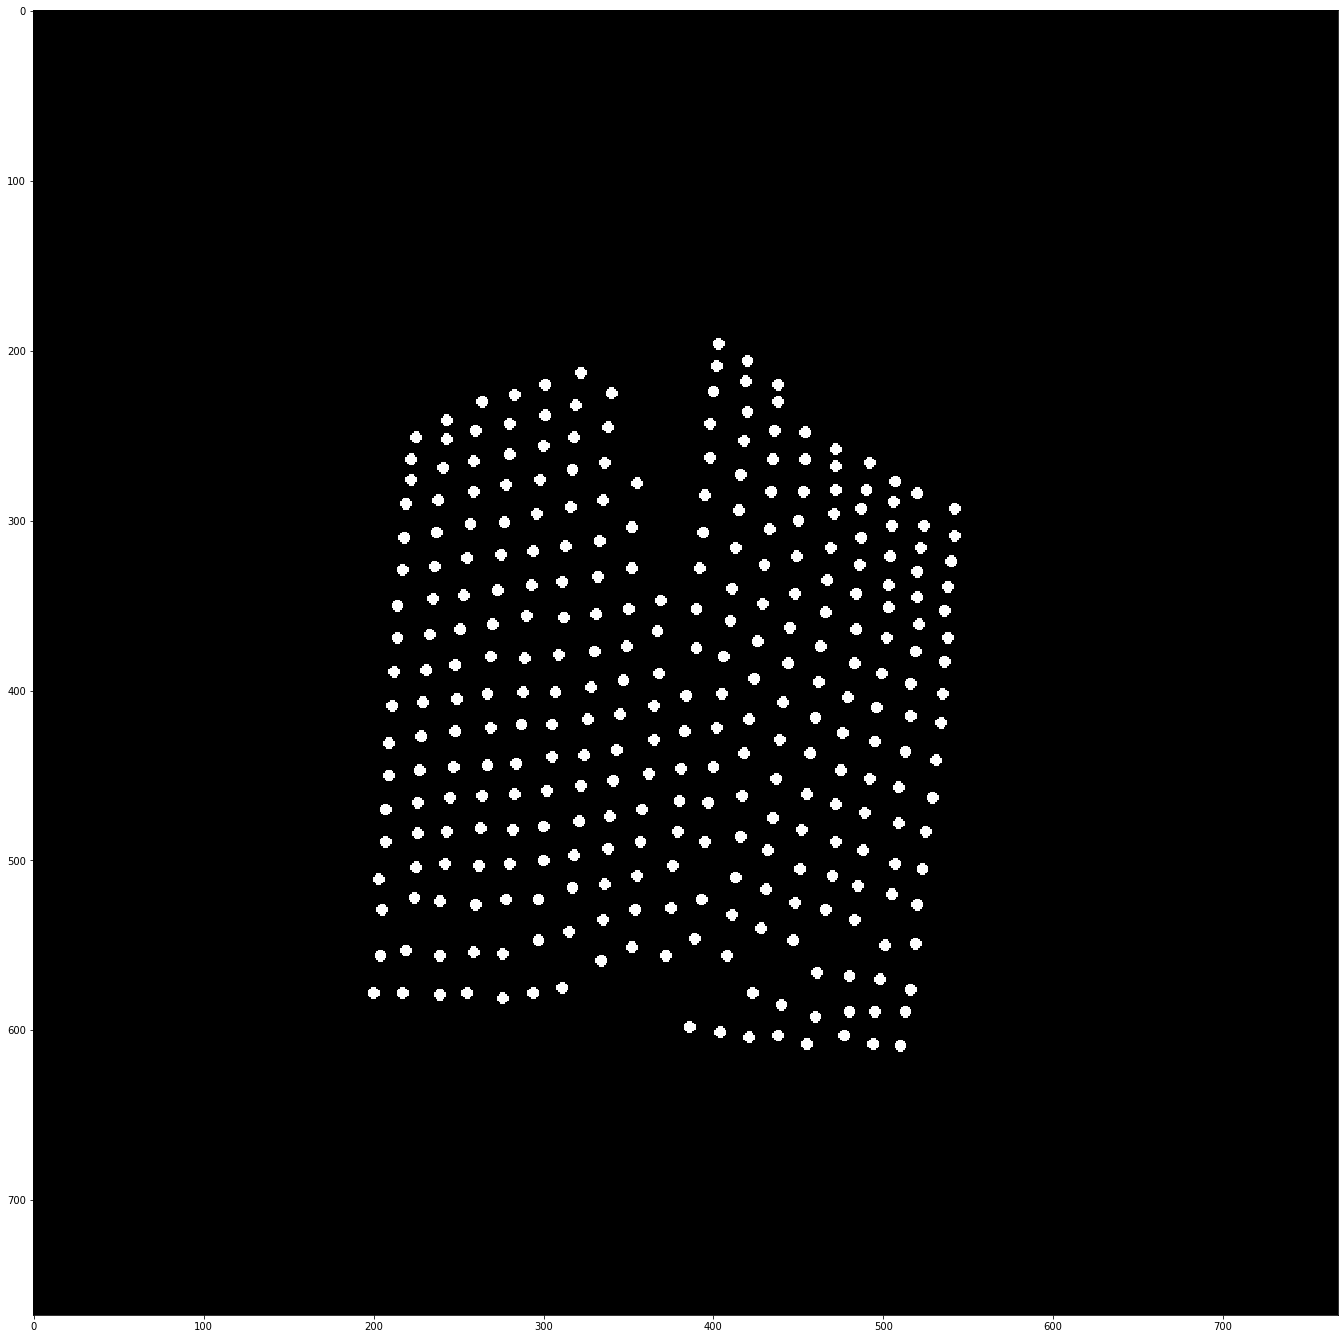

In [2]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/train"

sources = ["KK2_gap0_Cam_16904_Cine2_0_19",
           "KK4_gap0_Cam_16904_Cine2_0_19",
           "KK11_gap0_Cam_16904_Cine3_0_19",
           "KK16_gap0_Cam_16904_Cine2_0_19",
           "KK17_gap0_Cam_16904_Cine2_0_19",
           "KK18_gap0_Cam_16904_Cine2_0_19",
           "KK19_gap0_Cam_16904_Cine2_0_19",
           "KK24_gap0_Cam_16904_Cine2_0_19"]


image_index = 0
image_index_2_roi_2_xy = dict()

for video in sources:
    video_path = os.path.join(base_dir, "{}.avi".format(video))
    rois_path = os.path.join(base_dir, "{}.rois".format(video))
    
    reader = imageio.get_reader(video_path)
    reader_list = list(reader)
    
    file = open(rois_path)
    roi_data = json.load(file)
    
    for frame, image in enumerate(reader):        
        save_path = os.path.join(save_dir, "{}.png".format(image_index))
        plt.imsave(save_path, image, cmap="gray")
    
        rois = roi_data["frames"][frame]["roi_positions"]
        roi_2_xy = dict()
        
        mask = np.zeros(image.shape)
        
        for roi in rois:
            if not roi['placed']:
                continue

            id = roi['id']
            x = roi['pos']['x']
            y = roi['pos']['y']
            
            x = int(round(roi['pos']['x'], 0))
            y = int(round(roi['pos']['y'], 0))
            
            roi_2_xy[id] = (x, y)
            mask[y][x] =  255
            
        mask = gaussian(mask,sigma=0.9)
        mask = (mask / mask.max()) * 255
        
        print(mask.max())
        mask = np.where(mask>0.1, 1.0, 0.0)
        
        plt.imshow(mask, cmap="gray")
        
        mask_path = os.path.join(save_dir, "{}_m.png".format(image_index))
        plt.imsave(mask_path, mask, cmap="gray")
        
        json_path = os.path.join(save_dir, "{}.json".format(image_index))
        json_file = json.dumps(roi_2_xy)

        f = open(json_path, "w")
        f.write(json_file)
        f.close() 
        file.close()
        
        image_index += 1

# Validation Set

/home/julian/anaconda3/envs/avimod/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0


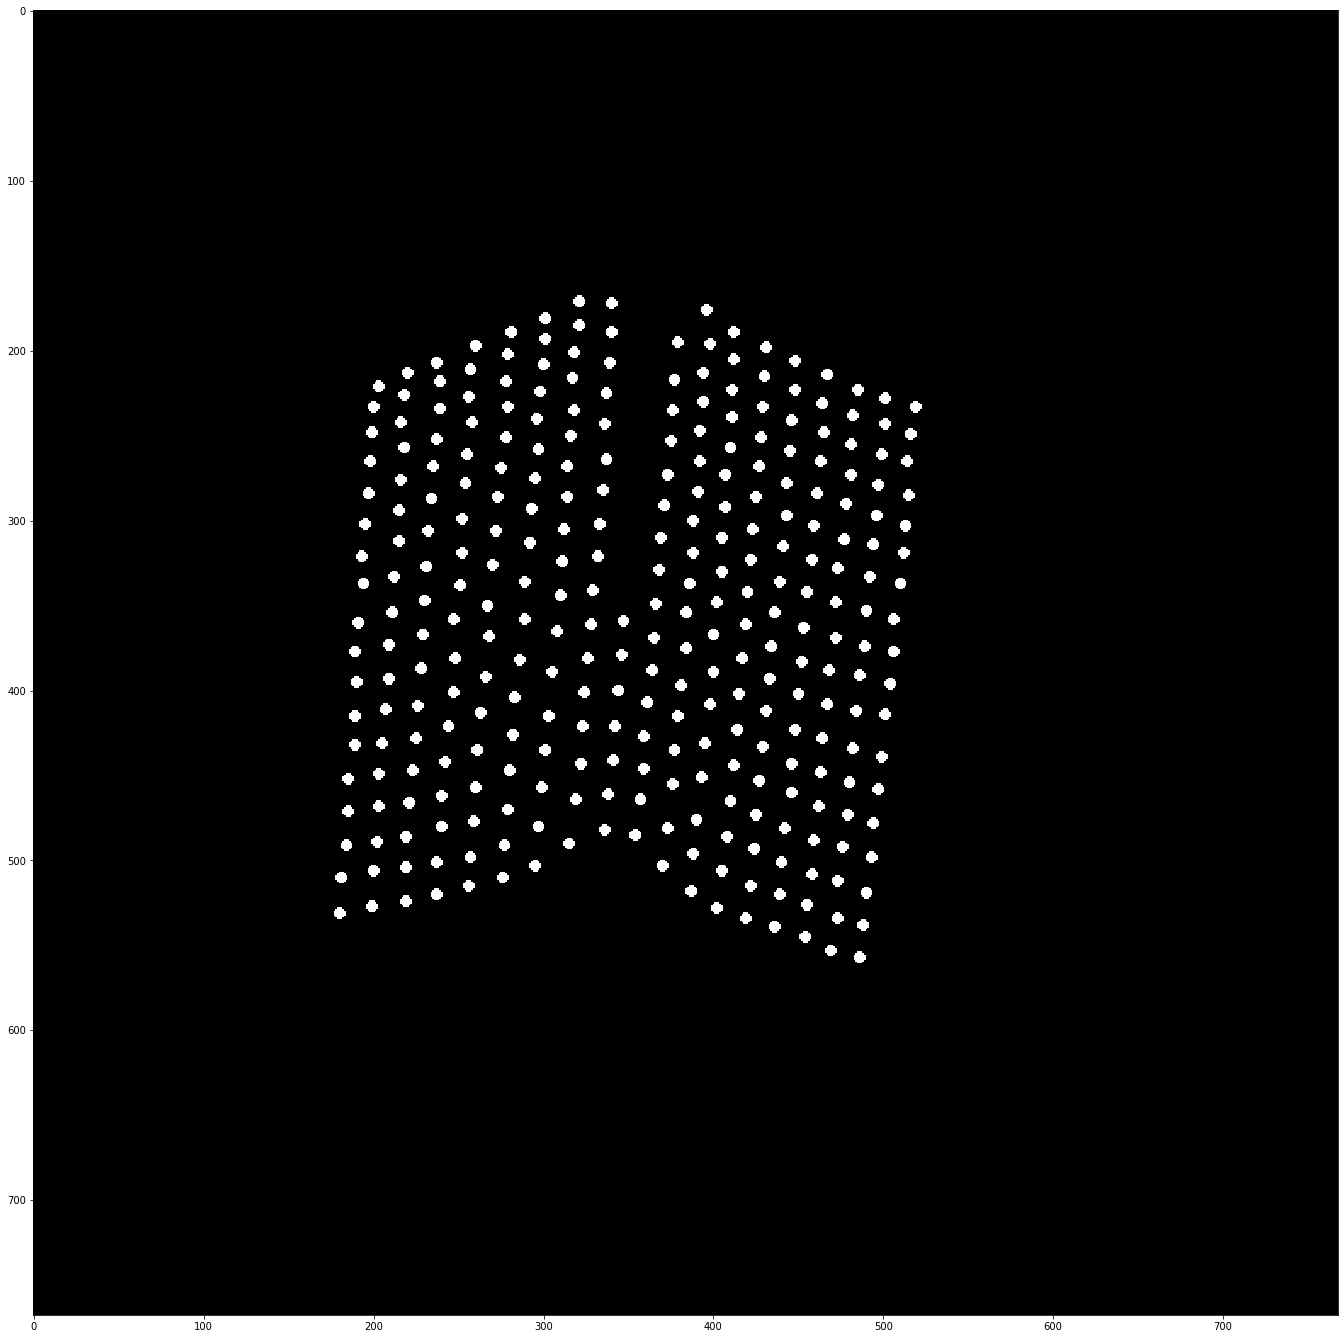

In [3]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/validation"

sources = ["KK3_gap0_Cam_16904_Cine2_0_19",
           "KK9_gap0_Cam_16904_Cine2_0_19"]


image_index = 160
image_index_2_roi_2_xy = dict()

for video in sources:
    video_path = os.path.join(base_dir, "{}.avi".format(video))
    rois_path = os.path.join(base_dir, "{}.rois".format(video))
    
    reader = imageio.get_reader(video_path)
    reader_list = list(reader)
    
    file = open(rois_path)
    roi_data = json.load(file)
    
    for frame, image in enumerate(reader):        
        save_path = os.path.join(save_dir, "{}.png".format(image_index))
        plt.imsave(save_path, image, cmap="gray")
    
        rois = roi_data["frames"][frame]["roi_positions"]
        roi_2_xy = dict()
        
        mask = np.zeros(image.shape)
        
        for roi in rois:
            if not roi['placed']:
                continue

            id = roi['id']
            x = roi['pos']['x']
            y = roi['pos']['y']
            
            x = int(round(roi['pos']['x'], 0))
            y = int(round(roi['pos']['y'], 0))
            
            roi_2_xy[id] = (x, y)
            mask[y][x] =  255
            
        mask = gaussian(mask,sigma=0.9)
        mask = (mask / mask.max()) * 255
        
        print(mask.max())
        mask = np.where(mask>0.1, 1.0, 0.0)
        
        plt.imshow(mask, cmap="gray")
        
        mask_path = os.path.join(save_dir, "{}_m.png".format(image_index))
        plt.imsave(mask_path, mask, cmap="gray")
        
        json_path = os.path.join(save_dir, "{}.json".format(image_index))
        json_file = json.dumps(roi_2_xy)

        f = open(json_path, "w")
        f.write(json_file)
        f.close() 
        file.close()
        
        image_index += 1

# Test Set

/home/julian/anaconda3/envs/avimod/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0


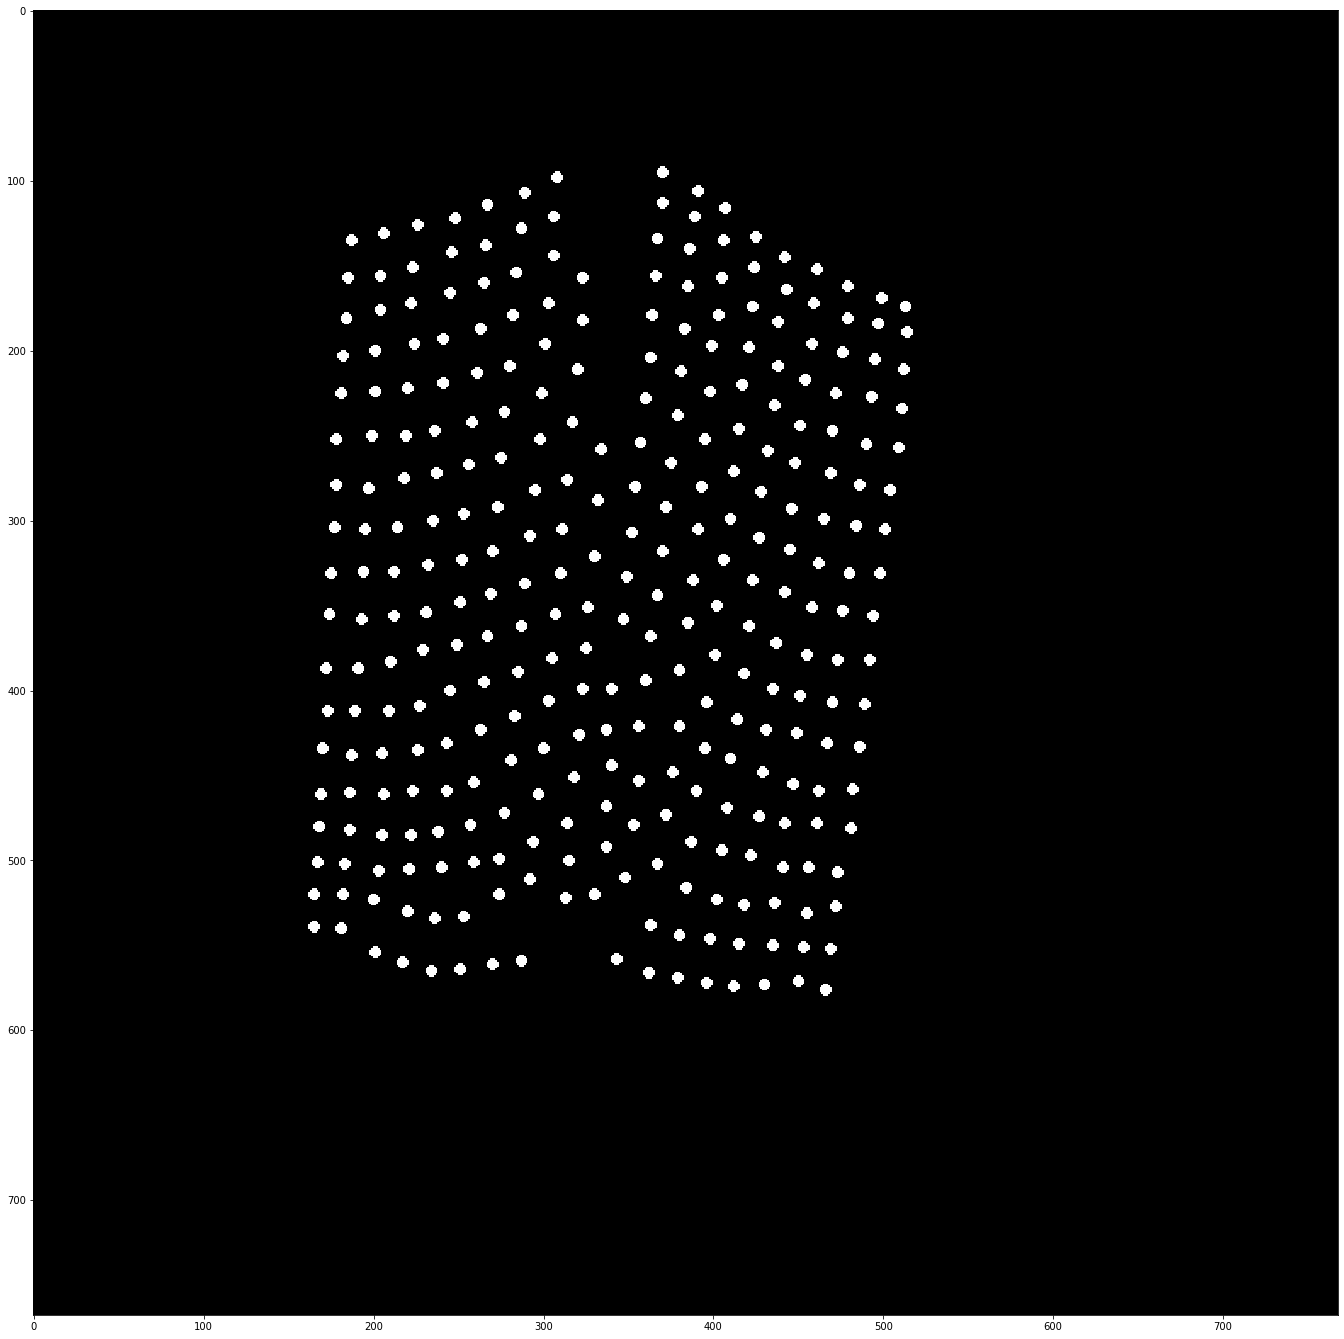

In [4]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/test"

sources = ["KK5_gap0_Cam_16904_Cine2_0_19",
           "KK20_gap0_Cam_16904_Cine2_0_19"]


image_index = 200
image_index_2_roi_2_xy = dict()

for video in sources:
    video_path = os.path.join(base_dir, "{}.avi".format(video))
    rois_path = os.path.join(base_dir, "{}.rois".format(video))
    
    reader = imageio.get_reader(video_path)
    reader_list = list(reader)
    
    file = open(rois_path)
    roi_data = json.load(file)
    
    for frame, image in enumerate(reader):        
        save_path = os.path.join(save_dir, "{}.png".format(image_index))
        plt.imsave(save_path, image, cmap="gray")
    
        rois = roi_data["frames"][frame]["roi_positions"]
        roi_2_xy = dict()
        
        mask = np.zeros(image.shape)
        
        for roi in rois:
            if not roi['placed']:
                continue

            id = roi['id']
            x = roi['pos']['x']
            y = roi['pos']['y']
            
            x = int(round(roi['pos']['x'], 0))
            y = int(round(roi['pos']['y'], 0))
            
            roi_2_xy[id] = (x, y)
            mask[y][x] =  255
            
        mask = gaussian(mask,sigma=0.9)
        mask = (mask / mask.max()) * 255
        
        print(mask.max())
        mask = np.where(mask>0.1, 1.0, 0.0)
        
        plt.imshow(mask, cmap="gray")
        
        mask_path = os.path.join(save_dir, "{}_m.png".format(image_index))
        plt.imsave(mask_path, mask, cmap="gray")
        
        json_path = os.path.join(save_dir, "{}.json".format(image_index))
        json_file = json.dumps(roi_2_xy)

        f = open(json_path, "w")
        f.write(json_file)
        f.close() 
        file.close()
        
        image_index += 1

# Create Moving Images

In [2]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2"
width = 768
height = 768

data_sets = ["train", "validation", "test"]

for data_set in data_sets:
    path = base_dir + "/" + data_set + "/*.json"
    globs = glob(path)
    globs = [int(path.split(os.sep)[-1].split(".")[0].split("_")[0]) for path in globs]
    image_ids = sorted(globs)

    for image_id in image_ids:
        data_path = base_dir + "/" + data_set + "/{}.json".format(image_id)
        with open(data_path) as data_file:
            data_json = json.load(data_file)

        moving = np.zeros((height, width))
        for key, value in data_json.items():
            moving[value[1]][value[0]] = 1

        moving = utils.apply_smoothing(moving, sigma=2, sigma_back=15)

        save_path = base_dir + "/" + data_set + "/" + "{}_mov.png".format(image_id)
        plt.imsave(save_path, moving, cmap='gray')

# Create LASTEN2_25

In [29]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2"

vals = [25]

for val in vals:
    read_dir = base_dir + "/train"
    write_dir = base_dir + "_{}/train".format(val)
    path = read_dir + "/*.json"
    
    used_ids = []
    
    globs = glob(path)
    globs = [int(path.split(os.sep)[-1].split(".")[0].split("_")[0]) for path in globs]
    image_ids = sorted(globs)
    
    random.shuffle(image_ids)
    
    n_data_points = val/100 * 320
    
    for i in range(int(n_data_points)):
        image_id = image_ids.pop()
        
        json_file_source = read_dir + "/{}.json".format(image_id)
        image_file_source = read_dir + "/{}_mov.png".format(image_id)
        
        json_file_destination = write_dir + "/{}.json".format(image_id)
        image_file_destination = write_dir + "/{}_mov.png".format(image_id)
        
        copyfile(json_file_source, json_file_destination)
        copyfile(image_file_source, image_file_destination)     


# To Create LASTEN2_10 take a subset of LASTEN2_25 and to create LASTEN2_50 take the whole training set